# Importing Libraries

In [1]:
import json
import pandas as pd
# import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from itertools import combinations

# Importing Data

In [9]:
with open("summary.json") as f:
    smry = json.load(f)
data = pd.read_csv("refined.csv")

In [10]:
d = list(data.keys())
dl = [f"Q{i}" for i in range(len(d))]
l = {d[i]: dl[i] for i in range(len(d))}
data.rename(l, axis=1, inplace=True)

# Defining Functions

In [4]:
def hist(col, hue = None, graph = False, data = data):
    s = {}
    for dat in data[col]:
        try: s[dat] += 1
        except KeyError:
            s[dat] = 1
    plt.plot()
    if graph: sns.histplot(data=data, x=col,  hue = hue, binwidth=1, binrange=(-0.5, max(data[col])))
    return s

In [85]:
def relation(c1, c2, data = data):
    global n
    l1, l2 = max(data[c1])+1, max(data[c2])+1 # 6, 4
    ll = l1*l2
    # print(l1, l2)
    ret = [None]*l1
    chk = [None]*l1
    for i in range(l1):
        x = data.query(f"{c1}=={i}")
        # print(i)
        ret[i] = [round(len(x.query(f"{c2}=={j}"))/3.12,2) for j in range(l2)]
        chk[i] = [int((len(x.query(f"{c2}=={j}"))/3.12)//(100/ll)) for j in range(l2)]
        h = 0
        while h<l2:
            if chk[i][h] > 6:
                print("\t", i, h)
                n += 1
            h += 1
    return [ret, chk]

## Printing Data Summary

In [58]:
smry

{'Whom do you consider an ideal scientist?': {'Someone who studies science and has a decent amount of knowledge on the subject': 0,
  'Someone who helps the society to utilize science': 1,
  'Someone whose only aim is development of science': 2,
  'Someone who enjoys to work with science and takes it as a career': 3},
 'What should be the most accurate metrics to judge the caliber of a scientist?': {'The amount of knowledge and wisdom which one has': 0,
  'The impact which he/she is making on the society': 1,
  'Number of good publications and patents': 2,
  'His bank-balance /social status/fame': 3},
 'What according to you should be the minimum educational qualification one should have to be considered a scientist?': {'10th pass': 0,
  'Does Not matter': 1,
  'Doctorate': 2,
  'Post Doctorate': 3,
  'Post Graduate': 4,
  'Graduate': 5,
  '12th pass': 6},
 'What do you think should be the most developed trait which one should have to become a successful scientist?': {'Intelligence': 0

In [5]:
for q in smry.keys():
    print(q)
    for key, value in smry[q].items():
        print("\t", value, key)
    print()

Whom do you consider an ideal scientist?
	 0 Someone who studies science and has a decent amount of knowledge on the subject
	 1 Someone who helps the society to utilize science
	 2 Someone whose only aim is development of science
	 3 Someone who enjoys to work with science and takes it as a career

What should be the most accurate metrics to judge the caliber of a scientist?
	 0 The amount of knowledge and wisdom which one has
	 1 The impact which he/she is making on the society
	 2 Number of good publications and patents
	 3 His bank-balance /social status/fame

What according to you should be the minimum educational qualification one should have to be considered a scientist?
	 0 10th pass
	 1 Does Not matter
	 2 Doctorate
	 3 Post Doctorate
	 4 Post Graduate
	 5 Graduate
	 6 12th pass

What do you think should be the most developed trait which one should have to become a successful scientist?
	 0 Intelligence
	 1 Innovative
	 2 Foresight
	 3 High motivation
	 4 Hardworking
	 5 Creat

In [57]:
data

0  1  2  3  4  5  6  7  8  9  10  11  12
0    0  0  0  0  0  0  0  0  0  0   0   0   0
1    1  1  1  1  1  1  1  0  0  0   1   1   1
2    2  1  1  2  2  2  1  0  1  0   2   0   1
3    2  1  2  3  3  3  1  1  0  0   3   1   1
4    1  2  1  4  2  1  2  2  1  1   1   0   1
..  .. .. .. .. .. .. .. .. .. ..  ..  ..  ..
307  3  1  1  5  4  2  1  2  0  0   2   1   1
308  0  0  2  3  0  2  3  0  0  0   0   1   1
309  1  1  1  1  1  2  0  0  0  0   1   1   1
310  1  1  2  5  0  1  2  0  0  2   3   0   1
311  3  0  1  2  1  1  1  0  1  0   1   1   1

[312 rows x 13 columns]

# Faltus

In [ ]:
g = sns.histplot(data=data, x="Q1",  hue = None, binwidth=1, binrange=(-0.5, 3.5))

In [ ]:
g = data.hist(column="Q0")

In [ ]:
a = hist("Q0","Q11")

In [ ]:
a

# Some Work

print(data.corr())

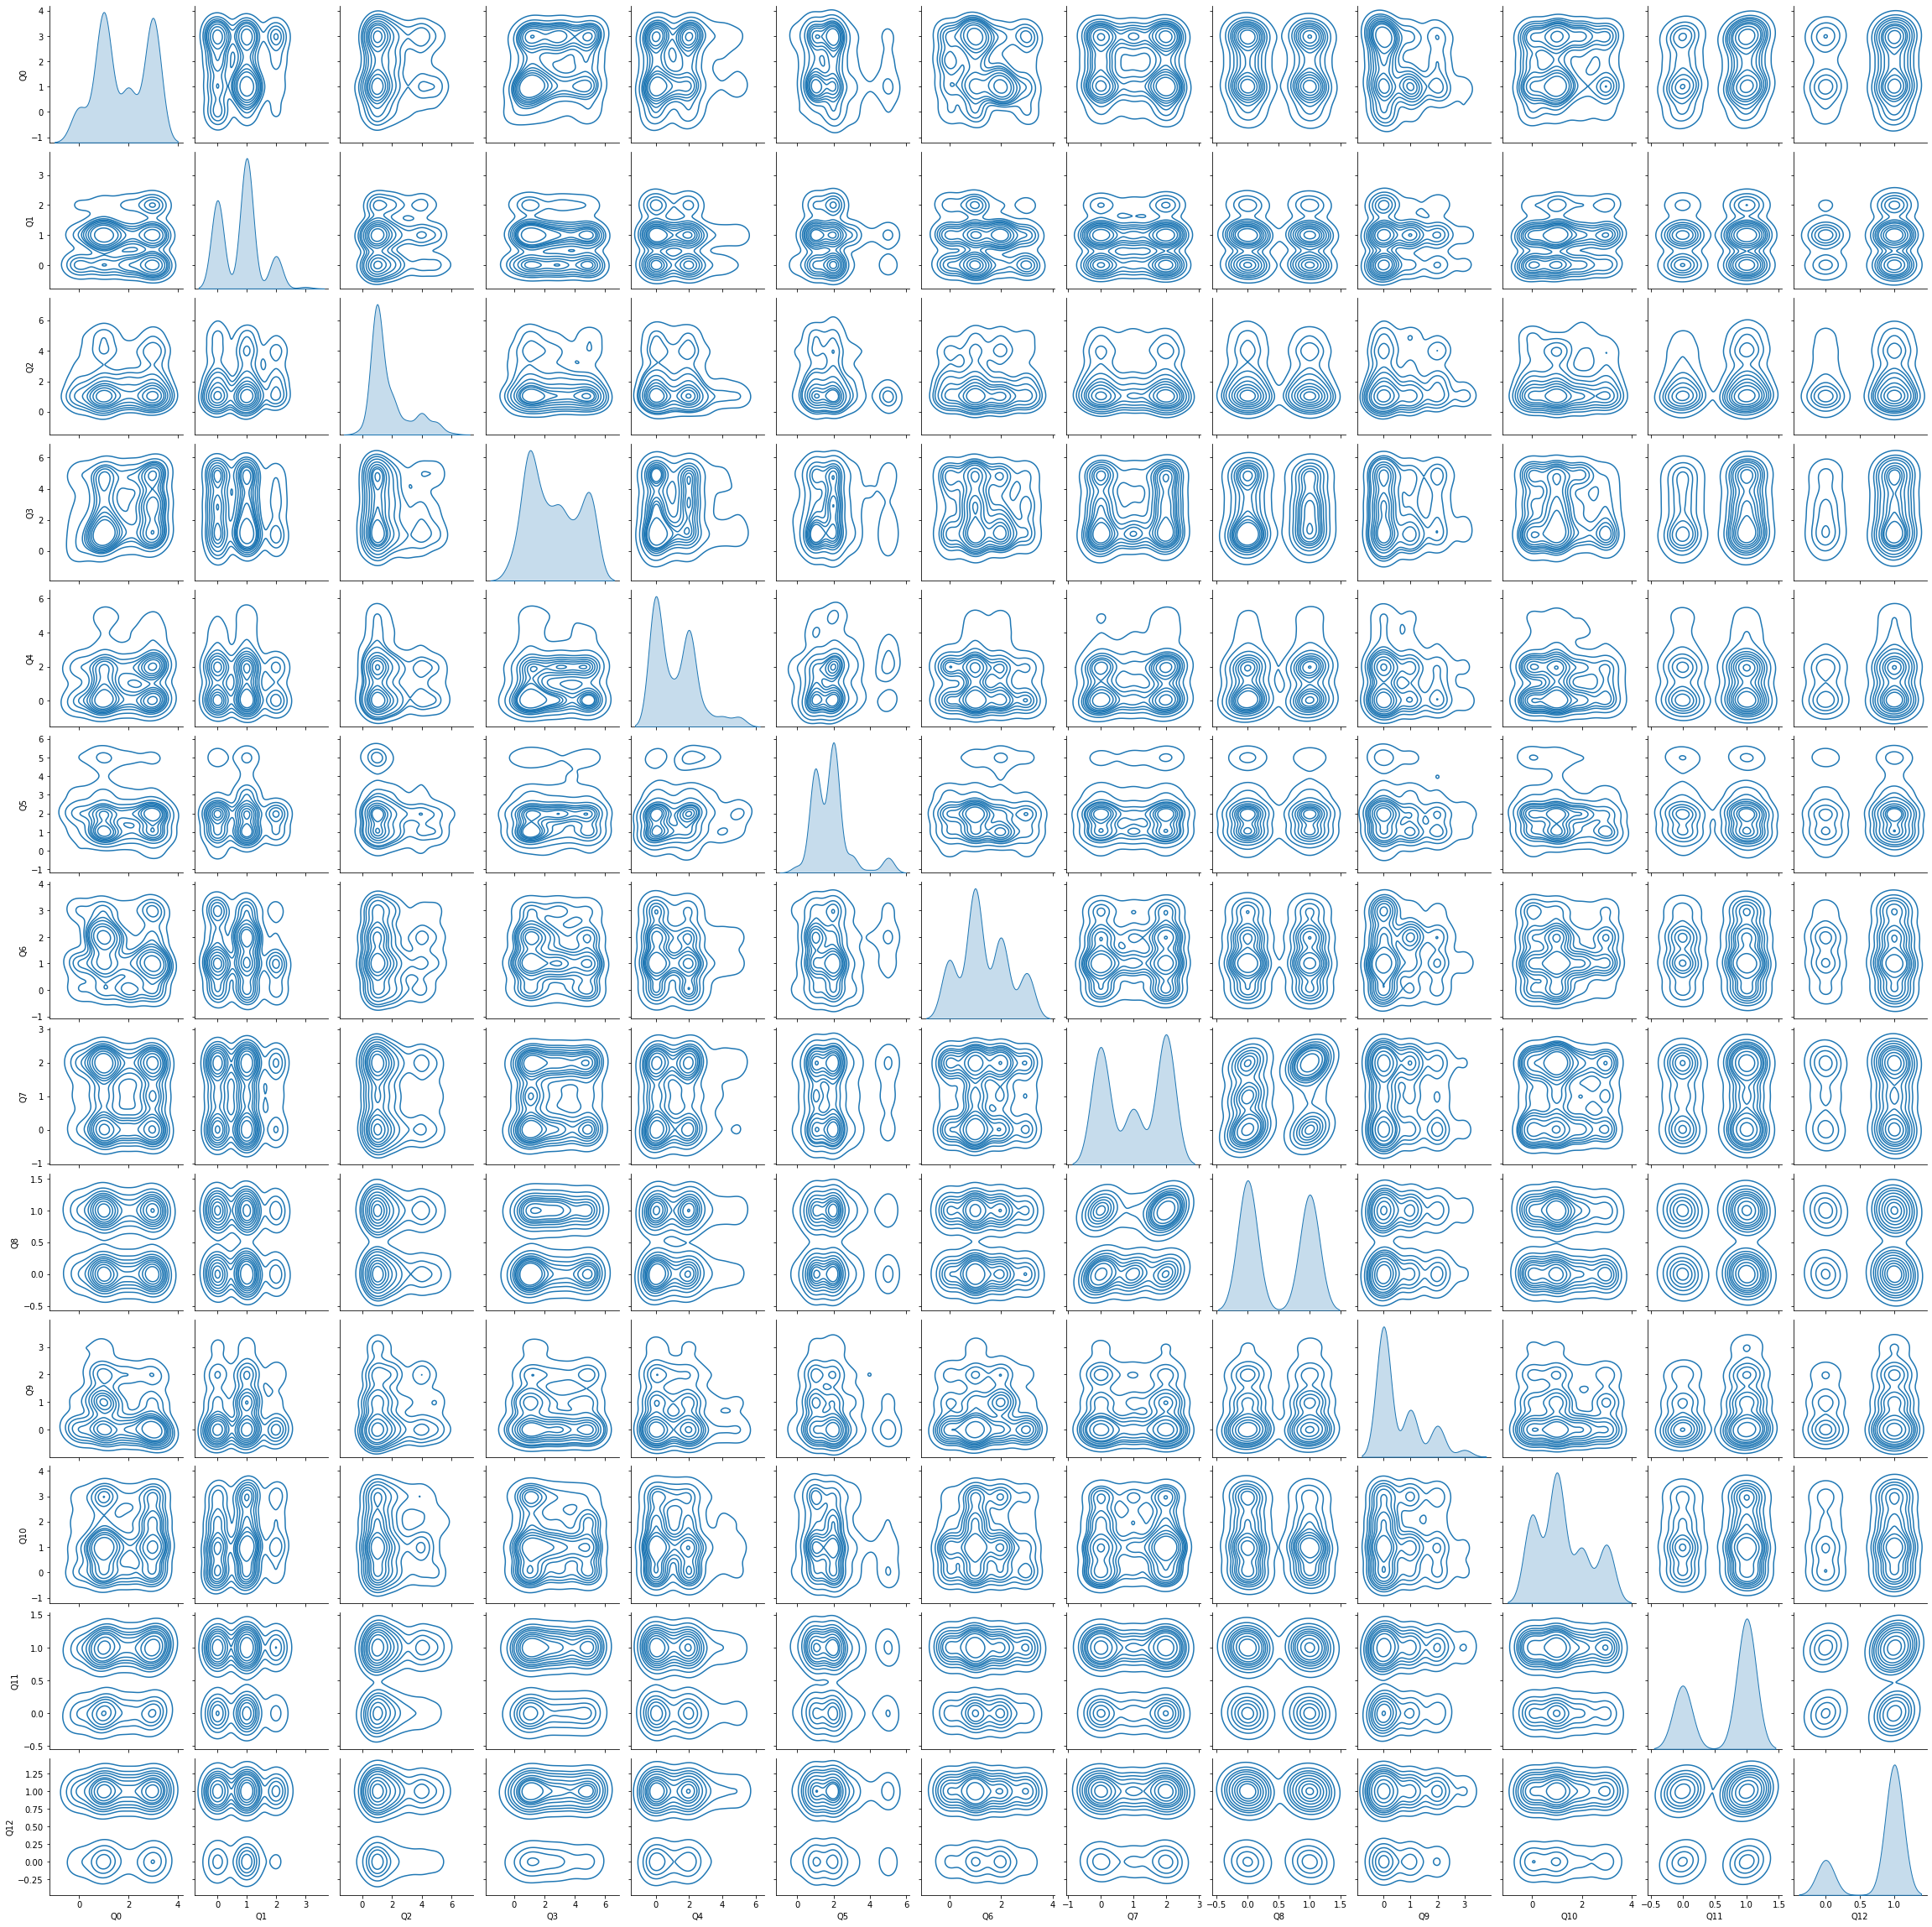

In [11]:
sns.pairplot(data, kind="kde")

# Actual Work

In [86]:
comb = combinations(data.keys(), 2)

In [87]:
# next(comb) # StopIteration

c = {}
chs = {}
n = 0
while True:
    try:
        do = next(comb)
        print(do)
        r, ch = relation(*do)
        c[f"{do[0]}-Q{do[1]}"] = r
        chs[f"{do[0]}-Q{do[1]}"] = ch
    except StopIteration:
        break

('Q0', 'Q1')
('Q0', 'Q2')
('Q0', 'Q3')
('Q0', 'Q4')
('Q0', 'Q5')
('Q0', 'Q6')
('Q0', 'Q7')
('Q0', 'Q8')
('Q0', 'Q9')
('Q0', 'Q10')
('Q0', 'Q11')
('Q0', 'Q12')
('Q1', 'Q2')
	 1 1
('Q1', 'Q3')
('Q1', 'Q4')
('Q1', 'Q5')
('Q1', 'Q6')
('Q1', 'Q7')
('Q1', 'Q8')
('Q1', 'Q9')
('Q1', 'Q10')
('Q1', 'Q11')
('Q1', 'Q12')
('Q2', 'Q3')
	 1 1
('Q2', 'Q4')
	 1 0
	 1 2
('Q2', 'Q5')
	 1 1
	 1 2
('Q2', 'Q6')
	 1 1
('Q2', 'Q7')
('Q2', 'Q8')
('Q2', 'Q9')
	 1 0
('Q2', 'Q10')
('Q2', 'Q11')
('Q2', 'Q12')
('Q3', 'Q4')
('Q3', 'Q5')
('Q3', 'Q6')
('Q3', 'Q7')
('Q3', 'Q8')
('Q3', 'Q9')
('Q3', 'Q10')
('Q3', 'Q11')
('Q3', 'Q12')
('Q4', 'Q5')
	 0 2
('Q4', 'Q6')
('Q4', 'Q7')
('Q4', 'Q8')
('Q4', 'Q9')
('Q4', 'Q10')
('Q4', 'Q11')
('Q4', 'Q12')
('Q5', 'Q6')
('Q5', 'Q7')
('Q5', 'Q8')
('Q5', 'Q9')
	 2 0
('Q5', 'Q10')
('Q5', 'Q11')
('Q5', 'Q12')
('Q6', 'Q7')
('Q6', 'Q8')
('Q6', 'Q9')
('Q6', 'Q10')
('Q6', 'Q11')
('Q6', 'Q12')
('Q7', 'Q8')
('Q7', 'Q9')
('Q7', 'Q10')
('Q7', 'Q11')
('Q7', 'Q12')
('Q8', 'Q9')
('Q8', 'Q10')
('Q8'

In [88]:
n

10

In [57]:
c

{'Q0-QQ1': [[5.77, 2.88, 1.28, 0.0],
  [5.77, 29.81, 2.24, 0.32],
  [7.05, 5.45, 2.88, 0.0],
  [16.35, 13.46, 6.41, 0.32]],
 'Q0-QQ2': [[0.64, 5.13, 1.92, 0.96, 0.64, 0.64, 0.0],
  [1.28, 25.0, 4.17, 1.28, 3.21, 2.88, 0.32],
  [0.0, 8.01, 4.81, 0.96, 1.28, 0.32, 0.0],
  [0.0, 22.44, 5.45, 2.24, 4.49, 1.6, 0.32]],
 'Q0-QQ3': [[2.24, 1.92, 1.6, 0.96, 0.64, 2.56],
  [1.6, 16.35, 5.77, 3.85, 4.49, 6.09],
  [0.64, 3.85, 2.24, 2.56, 2.24, 3.85],
  [0.64, 9.62, 4.81, 8.97, 3.21, 9.29]],
 'Q0-QQ4': [[5.13, 0.64, 3.85, 0.32, 0.0, 0.0],
  [17.95, 7.69, 8.97, 1.28, 0.64, 1.6],
  [6.09, 2.24, 5.13, 0.64, 0.64, 0.64],
  [15.06, 1.92, 14.42, 2.24, 1.92, 0.96]],
 'Q0-QQ5': [[0.64, 1.28, 6.09, 1.28, 0.0, 0.64],
  [0.0, 18.59, 13.14, 2.88, 0.64, 2.88],
  [0.32, 5.45, 7.69, 0.96, 0.0, 0.96],
  [1.28, 12.5, 20.51, 0.96, 0.32, 0.96]],
 'Q0-QQ6': [[2.56, 4.49, 0.0, 2.88],
  [4.17, 10.26, 19.55, 4.17],
  [6.09, 5.13, 2.24, 1.92],
  [5.77, 21.47, 3.85, 5.45]],
 'Q0-QQ7': [[3.21, 1.92, 4.81],
  [14.1, 6.09, 1

In [58]:
chs

{'Q0-QQ1': [[0, 0, 0, 0], [0, 4, 0, 0], [1, 0, 0, 0], [2, 2, 1, 0]],
 'Q0-QQ2': [[0, 1, 0, 0, 0, 0, 0],
  [0, 6, 1, 0, 0, 0, 0],
  [0, 2, 1, 0, 0, 0, 0],
  [0, 6, 1, 0, 1, 0, 0]],
 'Q0-QQ3': [[0, 0, 0, 0, 0, 0],
  [0, 3, 1, 0, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 2, 1, 2, 0, 2]],
 'Q0-QQ4': [[1, 0, 0, 0, 0, 0],
  [4, 1, 2, 0, 0, 0],
  [1, 0, 1, 0, 0, 0],
  [3, 0, 3, 0, 0, 0]],
 'Q0-QQ5': [[0, 0, 1, 0, 0, 0],
  [0, 4, 3, 0, 0, 0],
  [0, 1, 1, 0, 0, 0],
  [0, 2, 4, 0, 0, 0]],
 'Q0-QQ6': [[0, 0, 0, 0], [0, 1, 3, 0], [0, 0, 0, 0], [0, 3, 0, 0]],
 'Q0-QQ7': [[0, 0, 0], [1, 0, 2], [0, 0, 0], [1, 0, 1]],
 'Q0-QQ8': [[0, 0], [1, 1], [0, 0], [1, 1]],
 'Q0-QQ9': [[1, 0, 0, 0], [2, 2, 1, 0], [1, 0, 0, 0], [4, 0, 0, 0]],
 'Q0-QQ10': [[0, 0, 0, 0], [1, 2, 0, 1], [0, 0, 0, 0], [1, 2, 1, 1]],
 'Q0-QQ11': [[0, 0], [1, 2], [0, 0], [0, 2]],
 'Q0-QQ12': [[0, 0], [0, 2], [0, 1], [0, 2]],
 'Q1-QQ2': [[0, 5, 1, 0, 0, 0, 0],
  [0, 9, 1, 0, 1, 0, 0],
  [0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0]],
 'Q1-QQ3':

In [59]:
with open("relation_matrix_inf.json", "w") as f:
    json.dump(chs,f)